# Checking the XSPEC ALP+bkg files

To be able to use 'fakeit' function in XSPEC, we have to produce ALP+bkg files in PHA file format. This is done using the following HEASOFT function: https://heasarc.gsfc.nasa.gov/lheasoft/ftools/headas/ftflx2xsp.html. An example:

ftflx2xsp bn121225417_ALPbkg.txt bn121225417_ALPbkg.pha bn121225417_ALPbkg.rsp xunit='MeV' 

Note that the default yunit is ph/cm^2/s. The response file that is created is just a unit diagonal matrix of the appropriate size. We don't use this response file for later analysis, instead we load the GRB response file. 

To apply ftflx2xsp, the input file is bn121225417_ALP_xspec_$i.txt, containing 4 columns: column 1 is E_MIN, column 2 is E_MAX, column 3 is the spectrum, and column four is the uncertainty. E_MIN and E_MAX are the edges of every energy bin (corresponding to bkg_raw[2].data['E_MIN'] and bkg_raw[2].data['E_MAX'] from the LLE observation of the GRB). Column 3 is the spectrum (this is the array from Manuel's code, normalized by the relevant normalization values). Column 4 is the statistical uncertainty, same as that of the background observation. 

Let's take one of the normalizations to check if this is done correctly, for example N[20].

In [1]:
# importing 
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
E_LLE = np.load('bn121225417_EMeV.npy') # LLE energy bins, [MeV]
SED10_bkg = np.load('bn121225417SED10_norm_bkg.npy') # ALP SED normalized by N and added to the LLE bkg, [ph cm^-2 s^-1 MeV^-1]
energy_binsizes = np.ediff1d(E_LLE) # bin sizes in LLE
energy_binsizes = np.append(energy_binsizes, energy_binsizes[-1]) # repeating the last value, so that len(energy_binsizes) = 50


ALP20 = fits.open('bn121225417_ALP_xspec_20.pha') # this is the pha file for N[20]*(ALP+bkg), 
ALP20_rate = ALP20[1].data['RATE'] # [ph/s] 
ALP20_rate_dE = ALP20_rate / (energy_binsizes) # converting to units of [ph s^-1 MeV^-1]
SED10_20_bkg = SED10_bkg[20,] # this is our input file, units ph MeV^-1 s^-1 cm^-2

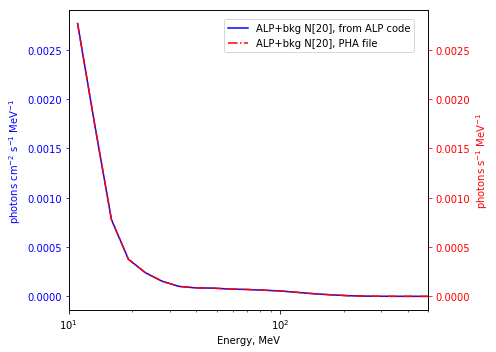

In [3]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax1.plot(E_LLE, SED10_20_bkg, color='b', label='ALP+bkg N[20], from ALP code')
ax1.set_xlabel('Energy, MeV')
ax1.set_ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xscale('log')


ax2 = ax1.twinx()
ax2.errorbar(E_LLE, ALP20_rate_dE, color='r', ls='-.', label='ALP+bkg N[20], PHA file')
ax2.set_ylabel('photons s$^{-1}$ MeV$^{-1}$', color='r')
ax2.tick_params('y', colors='r')
ax2.set_xscale('log')

plt.xlim(10, 5e2)
fig.legend(loc=(0.45,0.85))
fig.tight_layout()
plt.show()

In [4]:
# checking another one:

ALP25 = fits.open('bn121225417_ALP_xspec_25.pha') # this is the pha file for N[20]*(ALP+bkg), 
ALP25_rate = ALP25[1].data['RATE'] # [ph/s] 
ALP25_rate_dE = ALP25_rate / (energy_binsizes) # converting to units of [ph s^-1 MeV^-1]
SED10_25_bkg = SED10_bkg[25,] # this is our input file, units ph MeV^-1 s^-1 cm^-2

/Users/milena/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


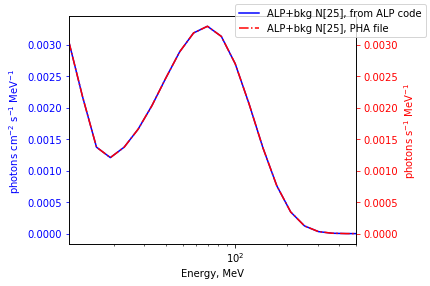

In [5]:
fig, ax1 = plt.subplots()
ax1.plot(E_LLE, SED10_25_bkg, color='b', label='ALP+bkg N[25], from ALP code')
ax1.set_xlabel('Energy, MeV')
ax1.set_ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xscale('log')


ax2 = ax1.twinx()
ax2.errorbar(E_LLE, ALP25_rate_dE, color='r', ls='-.', label='ALP+bkg N[25], PHA file')
ax2.set_ylabel('photons s$^{-1}$ MeV$^{-1}$', color='r')
ax2.tick_params('y', colors='r')
ax2.set_xscale('log')

plt.xlim(10, 5e2)
fig.legend()
fig.tight_layout()
plt.show()